# Support Vector Machine

In this project, we are implementing Support Vector Machine Algorithm with different datasets.

## DS1  

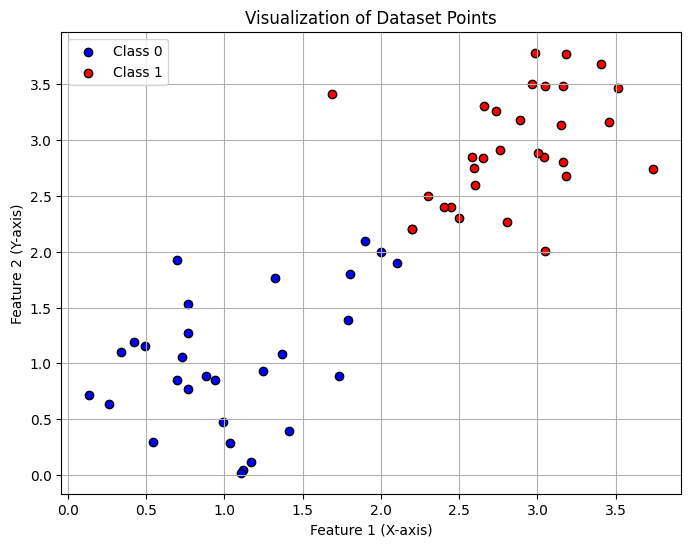

In [1]:
# 1. Design a dataset with at least 50 points for which the selection of C in a linear SVM makes a difference.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

## 1.1 Design a dataset where C makes a difference
def create_dataset(n=50):
    # Create two classes with some overlap
    X1 = np.random.normal(1, 0.5, (n//2, 2))
    X2 = np.random.normal(3, 0.5, (n//2, 2))
    
    # Create some points to test the classification for different C values
    overlap1 = np.array([[1.8, 1.8], [2.0, 2.0], [2.2, 2.2], [1.9, 2.1], [2.1, 1.9]])
    overlap2 = np.array([[2.2, 2.2], [2.4, 2.4], [2.6, 2.6], [2.3, 2.5], [2.5, 2.3]])
    
    X = np.vstack([X1, overlap1, X2, overlap2])
    y = np.array([0]*(len(X1)+len(overlap1)) + [1]*(len(X2)+len(overlap2)))
    
    return X, y

X, y = create_dataset()

# Create DataFrame
df_ds1 = pd.DataFrame(X, columns=['x1', 'x2'])
df_ds1['label'] = y

# Save as CSV
df_ds1.to_csv("D1.csv", index=False)

plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Class 0', edgecolors='k')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Class 1', edgecolors='k')
plt.xlabel('Feature 1 (X-axis)')
plt.ylabel('Feature 2 (Y-axis)')
plt.title('Visualization of Dataset Points')
plt.legend()
plt.grid(True)
plt.show()

I created two sets of 2D data points for the dataset, **X1** and **X2**, representing two different classes. The datasets were generated randomly using numpy with a normal Gaussian distribution, so the data will tend to cluster around the center. I also set the standard deviation to be 0,5 so the data will not be too spread. Each dataset is an array with shape (25, 2).

**X1** will be the "class 0" points with mean value 1, which makes the data clustered around (1,1).     
**X2** will be the "class 1" points with mean value 3, which makes the data clustered around (3,3).

I also added custom data points to each dataset to test the result of different C values.

SVM with default C=1.0


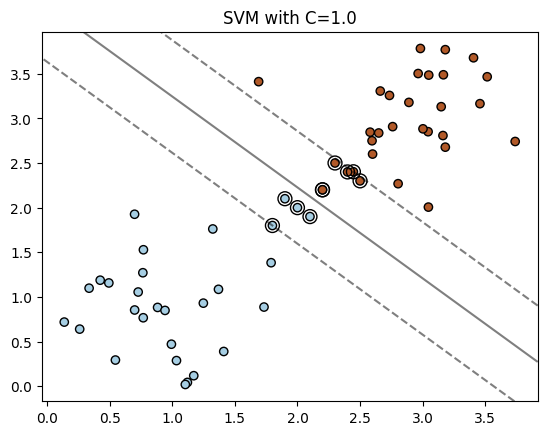

In [2]:
# 2. Load the data set (your own data set), train an SVM with a linear kernel on the full data set, and plot the data set with the decision boundary.

def plot_svm_decision_boundary(X, y, C=1.0, title='SVM Decision Boundary'):
    # Train the SVM
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)
    
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    
    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Highlight support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    plt.title(title)
    plt.show()
     
    return clf

print("SVM with default C=1.0")
clf_default = plot_svm_decision_boundary(X, y, C=1.0, title='SVM with C=1.0')

As shown in the figure above, with the value of C = 1, there are some support vectors that lie between the decision boundaries line (solid line) and the margin limit line (dashed line). Next, we will do the Leave-One-Out Cross-Validation which means training on 49 points and testing on 1, repeated for each data point.

In [3]:
# 1.3 Carry out a leave-1-out cross-validation with an SVM on your dataset. Report the train and test performance. Train performance in this case is the performance on the training set, test performance, the performance of the leave-1-out cross-validation.
def loo_cv(X, y, C=1.0):
    loo = LeaveOneOut()
    train_scores = []
    test_scores = []
    
    clf = svm.SVC(kernel='linear', C=C)
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        
        # Training score (on the training fold)
        train_pred = clf.predict(X_train)
        train_scores.append(accuracy_score(y_train, train_pred))
        
        # Test score (on the left-out sample)
        test_pred = clf.predict(X_test)
        test_scores.append(accuracy_score(y_test, test_pred))
    
    print(f"LOO CV with C={C}:")
    print(f"Average training accuracy: {np.mean(train_scores):.4f}")
    print(f"Average test accuracy: {np.mean(test_scores):.4f}")
    return np.mean(train_scores), np.mean(test_scores)

train_acc_default, test_acc_default = loo_cv(X, y, C=1.0)

LOO CV with C=1.0:
Average training accuracy: 0.9833
Average test accuracy: 0.9833


The accuracy of the training and test set is the same, which is 98%. Now let's compare with other C values. We gonna try the smaller C (softer margin) and bigger C (harder margin)


SVM with improved C=0.01


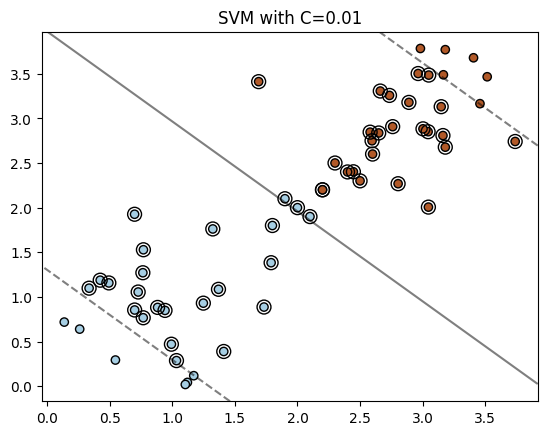

LOO CV with C=0.01:
Average training accuracy: 0.9333
Average test accuracy: 0.9333

SVM with improved C=0.1


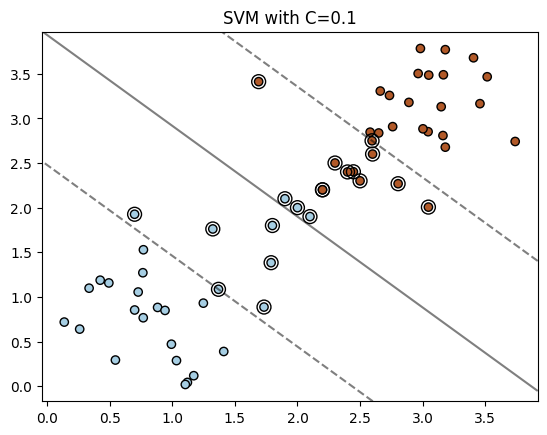

LOO CV with C=0.1:
Average training accuracy: 0.9333
Average test accuracy: 0.9333

SVM with improved C=10.0


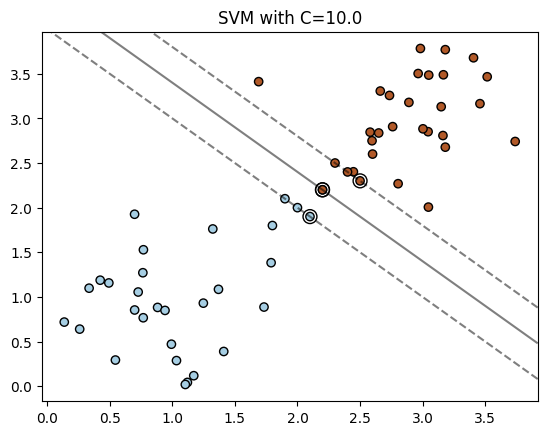

LOO CV with C=10.0:
Average training accuracy: 0.9833
Average test accuracy: 0.9833

SVM with improved C=100.0


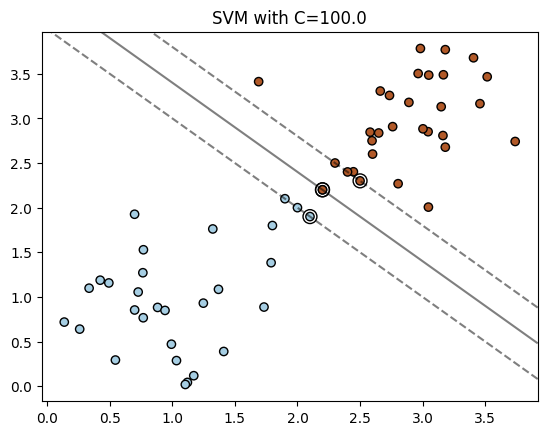

LOO CV with C=100.0:
Average training accuracy: 0.9836
Average test accuracy: 0.9667


In [4]:
# 1.4 Improve the SVM by changing C. Plot the data set and resulting decision boundary, give the performance.
C_improved = (0.01, 0.1, 10.0, 100.0)
for C in C_improved:
    print(f"\nSVM with improved C={C}")
    clf_improved = plot_svm_decision_boundary(X, y, C=C, title=f'SVM with C={C}')
    train_acc_improved, test_acc_improved = loo_cv(X, y, C=C)

So far, we tried five values of C: 0.01, 0.1, 1, 10, and 100. The result shows that the C values of 1 and 10 return the highest accuracy with 98,33%, while C values of 0.01 and 0.1 have lower accuracy with 93,33%. Meanwhile, when we set the C value to 100, we got a training accuracy of 98,36%, but the test accuracy is lower at 96,67%. 

The parameter C in SVM is the regularization parameter that controls the trade-off between achieving a perfect classification of training data and maximizing the margin.

If we set a large C value, the SVM will try to classify all training points correctly, even if it means having a very narrow margin. This can lead to overfitting, especially with noisy or overlapping data. In our case, C = 100 resulted in a narrow margin trying to separate the overlapping points perfectly. This resulted in overfitting, which was proven by lower test accuracy than the training accuracy mentioned before. 

On the other hand, setting a smaller value for C will allow the SVM to have some misclassification to achieve a wider margin. This generally leads to better generalization (better test performance). In our case, the values of 1 and 10 got the highest accuracy because they stopped trying to classify the overlapping points in the middle perfectly, and they also found a more reasonable decision boundary that better represents the overall distribution. The wider margin makes the model more robust to slight variations in new data. 

However, if we set the C value too low, it can lead to underfitting. When C is very small, the SVM prioritizes a wide margin over correctly classifying every training point. This makes the decision boundary smaller and the classification too generalized, making the model fail to follow actual data patterns. As in our case, low C values (0.1 and 0.01) have lower training and test accuracy, 93.33%. 

## DS2  

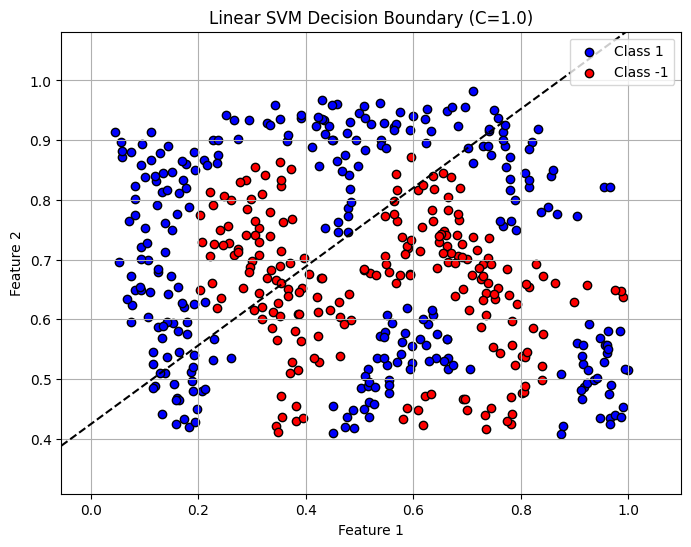

5-Fold CV Accuracy (Linear Kernel): 0.5740 (±0.0049)
Train Accuracy: 0.5775, Test Accuracy: 0.5600


In [5]:
# 2.1 Load Dataset, Train Linear SVM, and Do Cross-Validation 
from sklearn.model_selection import cross_val_score, train_test_split

# Load DS2
data = pd.read_csv("D2.csv", header=None)
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

# Train SVM with linear kernel
clf_linear = svm.SVC(kernel='linear', C=1.0)
clf_linear.fit(X, y)

# Plot decision boundary
def plot_decision_boundary(X, y, clf, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Class 1', edgecolors='k')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Class -1', edgecolors='k')

    # Create grid for decision boundary
    xx = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
    yy = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y, clf_linear, "Linear SVM Decision Boundary (C=1.0)")

# 5-fold cross-validation
cv_scores = cross_val_score(clf_linear, X, y, cv=5)
print(f"5-Fold CV Accuracy (Linear Kernel): {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

# Train-test split for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf_linear.fit(X_train, y_train)
train_acc = accuracy_score(y_train, clf_linear.predict(X_train))
test_acc = accuracy_score(y_test, clf_linear.predict(X_test))
print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

As we can see from the picture above, the cluster for each class is not linearly separable. The linear decision boundary cannot separate the data well, making it fail to capture the patterns. This is proven by the bad performance of training and test accuracy, which only reach 57,75% and 56% respectively.

For the cross-validation, I chose the 5-Fold Cross Validation over the LOO CV because LOO is computationally expensive, especially for larger datasets. LOO is also less stable for datasets with potential noise or nonlinear boundaries because it trains on every single dataset; a minor change (like omitting one noisy point) can cause the model to change significantly, leading to high variance in performance estimates. 5-fold cross-validation balances computation and evaluation reliability, providing a more representative estimate of test performance.

Next, we will try different kernels to separate the data clusters. I will use the Radial Basis Function (RBF) kernel for this.

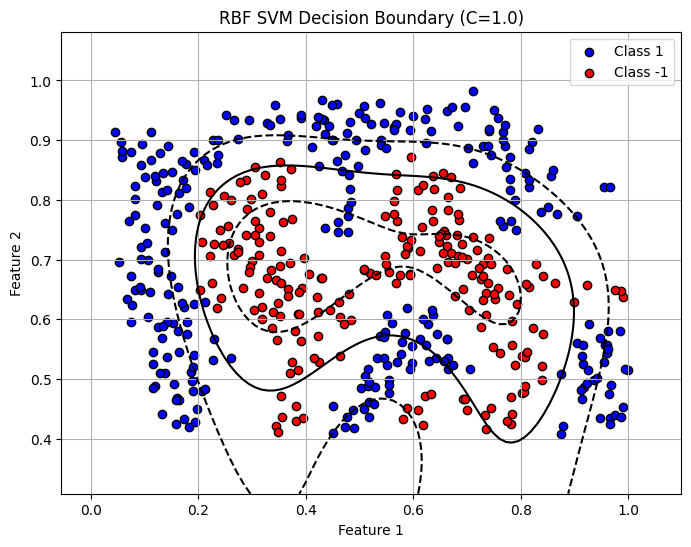

5-Fold CV Accuracy (RBF Kernel): 0.8400 (±0.0335)
Train Accuracy (RBF): 0.8700, Test Accuracy (RBF): 0.8300


In [6]:
# 2.2 Train SVM with RBF kernel
clf_rbf = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
clf_rbf.fit(X, y)

# Plot decision boundary
plot_decision_boundary(X, y, clf_rbf, "RBF SVM Decision Boundary (C=1.0)")

# 5-fold CV for RBF SVM
cv_scores_rbf = cross_val_score(clf_rbf, X, y, cv=5)
print(f"5-Fold CV Accuracy (RBF Kernel): {np.mean(cv_scores_rbf):.4f} (±{np.std(cv_scores_rbf):.4f})")

# Train-test split evaluation
clf_rbf.fit(X_train, y_train)
train_acc_rbf = accuracy_score(y_train, clf_rbf.predict(X_train))
test_acc_rbf = accuracy_score(y_test, clf_rbf.predict(X_test))
print(f"Train Accuracy (RBF): {train_acc_rbf:.4f}, Test Accuracy (RBF): {test_acc_rbf:.4f}")

As you can see, using the RBF kernel significantly improved performance compared to the linear SVM. The RBF decision boundary adapts better to nonlinear structures in the data.

RBF (Radial Basis Function) kernel is chosen because it is effective for datasets with curved or complex boundaries. The RBF kernel allows the SVM to create nonlinear decision boundaries by mapping the data into a higher-dimensional space where separation is easier. It effectively captures complex relationships between features without explicitly computing the transformation. RBF adapts to local variations in the data by creating multiple, localized decision regions. Points that are close to each other are assigned high similarity.

We choose RBF rather than other kernels like Polynomial and Sigmoid because the Polynomial Kernel requires carefully tuning the degree; if the degree is too high, it may overfit. Meanwhile, the Sigmoid kernel is very unstable and sensitive to hyperparameters; small changes in hyperparameters can lead to drastic changes in model behaviour. Besides, many studies and practical benchmarks show that the sigmoid kernel performs worse than Linear, RBF, and Polynomial Kernel (One of the example papers: https://ieeexplore.ieee.org/document/9456233).

## DS3  

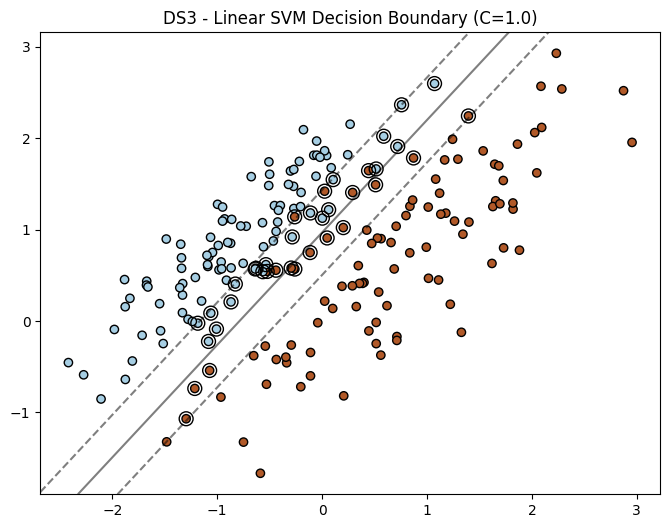

Train Accuracy: 0.9648, Test Accuracy: 0.9550


In [7]:
# 3.1 Load Dataset, Train Linear SVM, and Do Cross-Validation

from sklearn.model_selection import cross_val_score, KFold

# Load DS3
df_ds3 = pd.read_csv("D3.csv")

# Prepare DS3 data
X_ds3 = df_ds3.iloc[:, :2].values
y_ds3 = df_ds3.iloc[:, 2].values

# Function to plot decision boundaries
def plot_decision_boundary(X, y, clf, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()

# Train linear SVM
clf_linear_ds3 = svm.SVC(kernel='linear', C=1.0)
clf_linear_ds3.fit(X_ds3, y_ds3)

# Plot decision boundary
plot_decision_boundary(X_ds3, y_ds3, clf_linear_ds3, "DS3 - Linear SVM Decision Boundary (C=1.0)")

# 5-fold CV evaluation
kf_ds3 = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_linear = cross_val_score(clf_linear_ds3, X_ds3, y_ds3, cv=kf_ds3)

train_acc_linear = accuracy_score(y_ds3, clf_linear_ds3.predict(X_ds3))
test_acc_linear = np.mean(cv_scores_linear)

print(f"Train Accuracy: {train_acc_linear:.4f}, Test Accuracy: {test_acc_linear:.4f}")


For the cross-validation, I chose the 5-Fold Cross Validation over the LOO CV for the same reason as the task before. LOO is computationally expensive, especially for larger datasets. LOO is also less stable for datasets with potential noise or nonlinear boundaries because it trains on every single dataset; a minor change (like omitting one noisy point) can cause the model to change significantly, leading to high variance in performance estimates. 5-fold cross-validation balances computation and evaluation reliability, providing a more representative estimate of test performance.

From the result we gave above, using the dataset DS3, we can see that the data clusters are **mostly linearly separable**. When we train the data with soft margin linear SVM kernel with default C = 1, it got excellent performance with 96% accuracy for the training data and 95,5% accuracy for the test data.

However, we gonna try to optimize the performance further with nonlinear kernel and hyperparameter tuning.

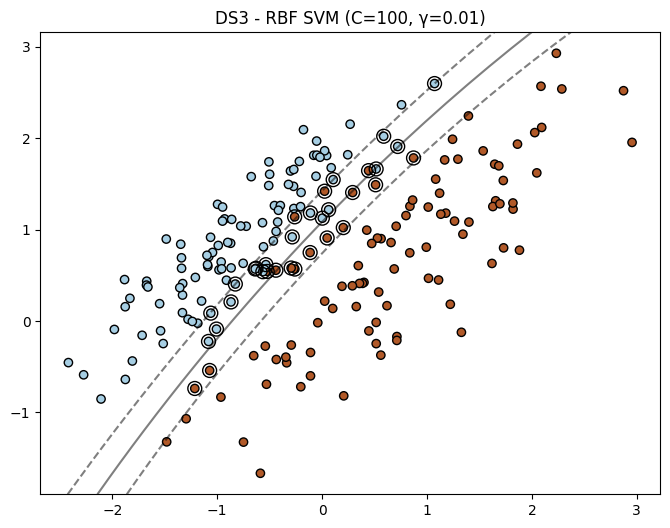

Best Parameters: C = 100, γ = 0.01
Train Accuracy: 0.9648
CV Accuracy: 0.9599


In [8]:
# 3.2 Pick a kernel and 2 hyperparameters to optimize, optimize the hyperparameters, plot again data set and decision boundary and give the performance.
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale']
}

# Set up the SVM with RBF kernel
svc_rbf = svm.SVC(kernel='rbf')

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svc_rbf, param_grid, cv=kf_ds3, scoring='accuracy')
grid_search.fit(X_ds3, y_ds3)

# Get best estimator and performance
best_rbf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
train_acc_best = accuracy_score(y_ds3, best_rbf_model.predict(X_ds3))
cv_acc_best = grid_search.best_score_

# Plot with best model
plot_decision_boundary(X_ds3, y_ds3, best_rbf_model, f"DS3 - RBF SVM (C={best_params['C']}, γ={best_params['gamma']})")

print(f"Best Parameters: C = {best_params['C']}, γ = {best_params['gamma']}")
print(f"Train Accuracy: {train_acc_best:.4f}")
print(f"CV Accuracy: {cv_acc_best:.4f}")


As explained in task 2, we chose the **RBF (Radial Basis Function)** kernel because of its ability to model complex, nonlinear decision boundaries. This is useful when the data is almost linearly separable, as RBF provides more flexibility around tight clusters or margins.

RBF Kernel, also known as Gaussian Kernel, calculates the similarity between two points $x_i$ and $x_j$ using the formula:

$$
K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)
$$

Where:
- $x_i$ and $x_j$ are feature vectors,
- $\|x_i - x_j\|^2$ is the squared euclidian distance,
- $\gamma$ controls the width of the Gaussian function.

For the optimization using RBF Kernel, I chose two hyperparameters:
- **C**: Controls how much the model tries to avoid misclassifying each training example.
- **Gamma (γ)**: Controls how far the influence of a single training point extends.

If we set a small gamma value, far-apart points are still considered similar. This is called **Global Influence**. The decision boundary is smoother and has a larger margin. On the other hand, if the value of gamma is big, only very close points will be seen as similar (**Localized Influence**). The decision boundary becomes tighter. Meanwhile, the gamma 'scaled' in sklearn dynamically adjusts the gamma value based on data variance and the number of features.

If combined with the value of C, High gamma and High C will make the decision boundary very tight. Meanwhile, low gamma and low C make the decision boundary very smooth.

From the Grid Search Cross Validation result, the best model achieved a slightly higher cross-validation accuracy than the linear SVM with 95.99% and retained high training accuracy. This indicates that RBF with these hyperparameters generalizes well to new data without overfitting.